1.	What datetime range does your data cover?  How many rows are there total?

In [53]:
import csv
import datetime
total_rows = 0
min_datetime = None
max_datetime = None
invalid_rows = []
with open("trip_data_11.csv", "r") as f:
    reader = csv.reader(f)
    header = [col.strip() for col in next(reader)]
    
    pickup_datetime_index = header.index('pickup_datetime')
    dropoff_datetime_index = header.index('dropoff_datetime')
    for row in reader:
        total_rows += 1
        cur_pickup_dt_str = row[pickup_datetime_index]
        cur_dropoff_dt_str = row[dropoff_datetime_index]
        try:
            cur_pickup_dt = datetime.datetime.strptime(cur_pickup_dt_str, '%Y-%m-%d %H:%M:%S')
            cur_dropoff_dt = datetime.datetime.strptime(cur_dropoff_dt_str, '%Y-%m-%d %H:%M:%S')
            if min_datetime == None or cur_pickup_dt < min_datetime:
                min_datetime = cur_pickup_dt
            if max_datetime == None or cur_dropoff_dt > max_datetime:
                max_datetime = cur_dropoff_dt
        except ValueError:
            invalid_rows.append((total_rows, cur_pickup_dt_str, cur_dropoff_dt_str))

print(f"The datetime range of the data is {min_datetime} and {max_datetime}")
print(f"The total number of rows in the data: {total_rows}")

# if invalid_rows:
#     print(f"\nFound {len(invalid_rows)} invalid datetime records:")
#     for row_num, invalid_dt1, invalid_dt2 in invalid_rows:
#         print(f"Row {row_num}: {invalid_dt1}, {invalid_dt2}")
# else:
    # print("No invalid datetime records found.")

The datetime range of the data is 2013-11-01 00:00:00 and 2013-12-01 01:47:54
The total number of rows in the data: 14388451


2.	What are the field names?  Give descriptions for each field.

In [66]:
with open("trip_data_11.csv", "r") as f:
    reader = csv.reader(f)
    header = [col.strip() for col in next(reader)]

    description = ["This field refers to permit number indicating the vehicle can be operated as a taxi",
                "This field refers to license number that allows a person to operate a taxi",
                "This field indicates the vendor/company code for the taxi vehicle",
                "This field refers to different types of rate categories for the taxi",
                "This field indicates whether the trip record was stored in the vehicle memory before forwarding to the server",
                "This field indicates the date and time of passenger pick up",
                "This field indicates the date and time of passenger drop off",
                "This field indicates the count/number of passengers",
                "This field indicates the duration of the trip in seconds",
                "This field indicates the distance covered for the trip",
                "This field indicates the longitude coordinates for the pickup location of the trip",
                "This field indicates the latitude coordinates for the pickup location of the trip",
                "This field indicates the longitude coordinates for the drop off location of the trip",
                "This field indicates the latitude coordinates for the drop off location of the trip"]

    print(f"{'Field'.ljust(25)}| Description")
    print("-" * 150)
    for field, desc in zip(header, description):
        print(f"{field.ljust(25)}| {desc}.")


Field                    | Description
------------------------------------------------------------------------------------------------------------------------------------------------------
medallion                | This field refers to permit number indicating the vehicle can be operated as a taxi.
hack_license             | This field refers to license number that allows a person to operate a taxi.
vendor_id                | This field indicates the vendor/company code for the taxi vehicle.
rate_code                | This field refers to different types of rate categories for the taxi.
store_and_fwd_flag       | This field indicates whether the trip record was stored in the vehicle memory before forwarding to the server.
pickup_datetime          | This field indicates the date and time of passenger pick up.
dropoff_datetime         | This field indicates the date and time of passenger drop off.
passenger_count          | This field indicates the count/number of passengers.
trip_time

3.	Give some sample data for each field.

In [67]:
with open("trip_data_11.csv", "r") as f:
    reader = csv.reader(f)
    header = [col.strip() for col in next(reader)]
    sample_data = []
    print("Below is the sample data for each of the fields:")

    for row_num, row in enumerate(reader, start=1):
        if row_num > 3:
            break
        sample_data.append(row)

    column_widths = [max(len(header[i]), max(len(row[i]) for row in sample_data)) + 2 for i in range(len(header))]

    fields = ' | '.join(f"{header[i].ljust(column_widths[i])}" for i in range(len(header)))
    print(fields)
    
    print('-' * len(fields))

    for row in sample_data:
        print(' | '.join(f"{row[i].ljust(column_widths[i])}" for i in range(len(row))))

Below is the sample data for each of the fields:
medallion                          | hack_license                       | vendor_id   | rate_code   | store_and_fwd_flag   | pickup_datetime       | dropoff_datetime      | passenger_count   | trip_time_in_secs   | trip_distance   | pickup_longitude   | pickup_latitude   | dropoff_longitude   | dropoff_latitude  
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
E9A54865CAF737ED003957478C9D8FA1   | 912A2B86F30CDFE246586972A892367E   | CMT         | 1           | N                    | 2013-11-25 15:53:33   | 2013-11-25 16:00:51   | 1                 | 437                 | .60             | -73.978104         | 40.752968         | -73.985756          | 40.762684         
43D85E

4.	What MySQL data types / len would you need to store each of the fields?

    a.	int(xx), varchar(xx),date,datetime,bool, decimal(m,d)

In [76]:
import csv
with open("trip_data_11.csv", "r") as f:
    reader = csv.reader(f)
    max_len = 0
    header = [col.strip() for col in next(reader)]
    # for row in reader:
    #     l = len(row[header.index("vendor_id")])
    #     if max_len < l:
    #         max_len = l
    # print(max_len)
    mysql_data_types = [
        "CHAR(32)",
        "CHAR(32)",
        "CHAR(3)",
        "INT",
        "BOOLEAN",
        "DATETIME",
        "DATETIME",
        "INT",
        "INT",
        "FLOAT",
        "DECIMAL(9, 6)",
        "DECIMAL(9, 6)",
        "DECIMAL(9, 6)",
        "DECIMAL(9, 6)"
    ]
    print(f"{'Field'.ljust(25)}| Datatypes(len)")
    print("-" * 50)
    for field, desc in zip(header, mysql_data_types):
        print(f"{field.ljust(25)}| {desc}")


Field                    | Datatypes(len)
--------------------------------------------------
medallion                | CHAR(32)
hack_license             | CHAR(32)
vendor_id                | CHAR(3)
rate_code                | INT
store_and_fwd_flag       | BOOLEAN
pickup_datetime          | DATETIME
dropoff_datetime         | DATETIME
passenger_count          | INT
trip_time_in_secs        | INT
trip_distance            | FLOAT
pickup_longitude         | DECIMAL(9, 6)
pickup_latitude          | DECIMAL(9, 6)
dropoff_longitude        | DECIMAL(9, 6)
dropoff_latitude         | DECIMAL(9, 6)


5.	What is the geographic range of your data (min/max - X/Y)?
    
    a.	Plot this (approximately on a map)

In [68]:
import csv

min_longitude = float('inf')
max_longitude = float('-inf')
min_latitude = float('inf')
max_latitude = float('-inf')

valid_min_latitude = -90
valid_max_latitude = 90
valid_min_longitude = -180
valid_max_longitude = 180

longitudes_list = []
latitudes_list = []

with open("trip_data_11.csv", "r") as f:
    reader = csv.reader(f)
    header = [col.strip() for col in next(reader)]
    pickup_longitude_index = header.index('pickup_longitude')
    pickup_latitude_index = header.index('pickup_latitude')
    dropoff_longitude_index = header.index('dropoff_longitude')
    dropoff_latitude_index = header.index('dropoff_latitude')
    i=0
    valid_rows = 0
    for row in reader:
        i += 1
        pickup_longitude_str = row[pickup_longitude_index].strip()
        pickup_latitude_str = row[pickup_latitude_index].strip()
        dropoff_longitude_str = row[dropoff_longitude_index].strip()
        dropoff_latitude_str = row[dropoff_latitude_index].strip()
        if pickup_longitude_str and pickup_latitude_str and dropoff_longitude_str and dropoff_latitude_str:
            try:
                pickup_longitude = float(row[pickup_longitude_index])
                pickup_latitude = float(row[pickup_latitude_index])
                dropoff_longitude = float(row[dropoff_longitude_index])
                dropoff_latitude = float(row[dropoff_latitude_index])

                if (valid_min_longitude <= pickup_longitude <= valid_max_longitude and
                    valid_min_latitude <= pickup_latitude <= valid_max_latitude and
                    valid_min_longitude <= dropoff_longitude <= valid_max_longitude and
                    valid_min_latitude <= dropoff_latitude <= valid_max_latitude):

                    longitudes_list.extend([pickup_longitude, dropoff_longitude])
                    latitudes_list.extend([pickup_latitude, dropoff_latitude])
                    valid_rows += 1

                    # min_longitude = min(min_longitude, pickup_longitude, dropoff_longitude)
                    # max_longitude = max(max_longitude, pickup_longitude, dropoff_longitude)
                    # min_latitude = min(min_latitude, pickup_latitude, dropoff_latitude)
                    # max_latitude = max(max_latitude, pickup_latitude, dropoff_longitude)
                    # print(min_latitude, min_longitude, max_latitude, max_longitude)

                # else:
                #     print(f"Coordinates are out of range in row {i}: {pickup_longitude}, {pickup_latitude}, {dropoff_longitude}, {dropoff_latitude}")

            except ValueError:
                print(f"Invalid format for the following row: {row}")
                break


def iqr(values):
    sorted_values = sorted(values)
    q1 = sorted_values[len(sorted_values) // 4]
    q3 = sorted_values[(3 * len(sorted_values)) // 4]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

longitude_bounds = iqr(longitudes_list)
latitude_bounds = iqr(latitudes_list)


longitudes_filtered = [lng for lng in longitudes_list if longitude_bounds[0] <= lng <= longitude_bounds[1]]
latitudes_filtered = [lat for lat in latitudes_list if latitude_bounds[0] <= lat <= latitude_bounds[1]]

print(f"Final Geographic Range:")
print(f"Longitude: Min = {min(longitudes_filtered)}, Max = {max(longitudes_filtered)}")
print(f"Latitude: Min = {min(latitudes_filtered)}, Max = {max(latitudes_filtered)}")


Final Geographic Range:
Longitude: Min = -74.031761, Max = -73.924896
Latitude: Min = 40.682972, Max = 40.818737


Used geojson.io with the above coordinates to plot this over the map.
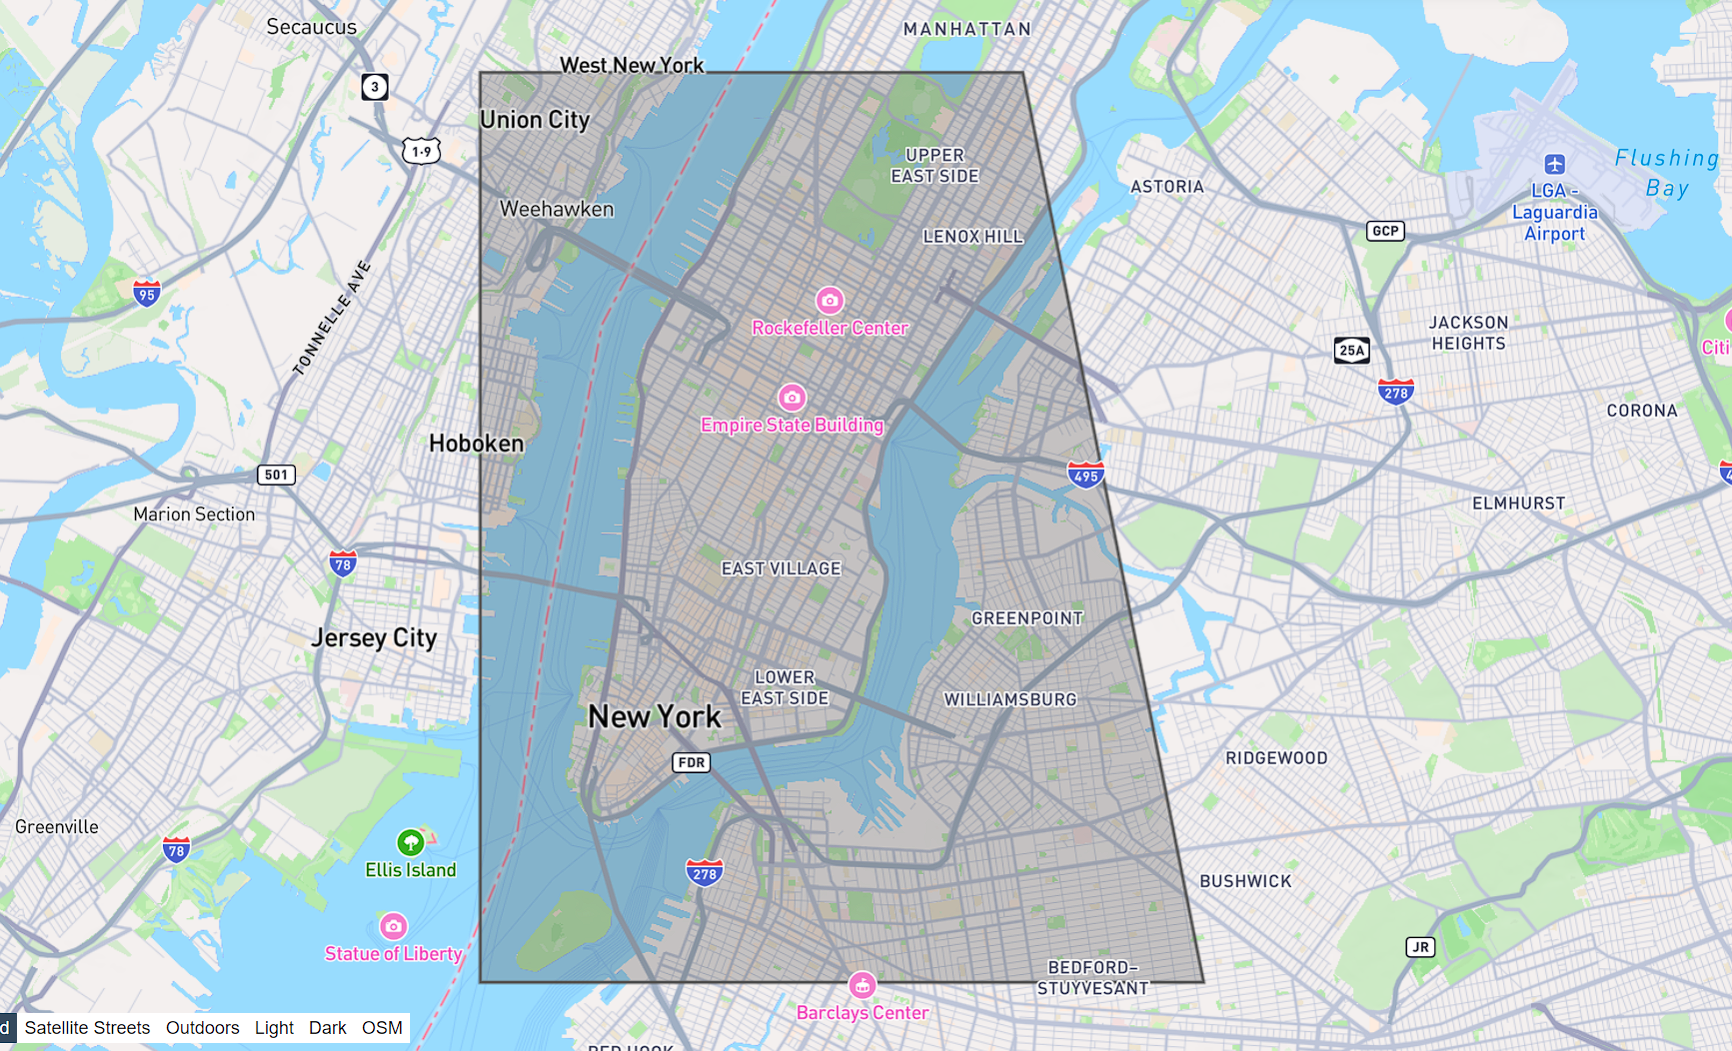

6.	What is the average overall computed trip distance? (You should use Haversine Distance)

    a.	Draw a histogram of the trip distances binned anyway you see fit.


Average Trip Distance: 10.33 miles


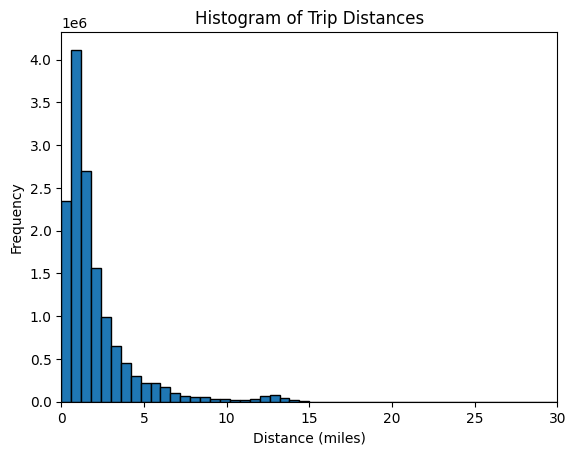

In [71]:
import csv
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956
    return c * r

total_distance = 0
total_trips = 0
distances_list = []

with open("trip_data_11.csv", "r") as f:
    reader = csv.reader(f)
    header = [col.strip() for col in next(reader)]
    pickup_longitude_index = header.index('pickup_longitude')
    pickup_latitude_index = header.index('pickup_latitude')
    dropoff_longitude_index = header.index('dropoff_longitude')
    dropoff_latitude_index = header.index('dropoff_latitude')

    for row in reader:
        try:
            pickup_longitude = float(row[pickup_longitude_index].strip())
            pickup_latitude = float(row[pickup_latitude_index].strip())
            dropoff_longitude = float(row[dropoff_longitude_index].strip())
            dropoff_latitude = float(row[dropoff_latitude_index].strip())

            distance = haversine(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)
            distances_list.append(distance)
            total_distance += distance
            total_trips += 1

        except ValueError:
            continue

if total_trips > 0:
    average_distance = total_distance / total_trips
    print(f"Average Trip Distance: {average_distance:.2f} miles")
else:
    print("No valid trip data found.")

import matplotlib.pyplot as plt

plt.hist(distances_list, bins=50, edgecolor='black', range=(0, 30))
plt.title("Histogram of Trip Distances")
plt.xlabel("Distance (miles)")
plt.ylabel("Frequency")
plt.xlim(0, 30)
plt.show()


7.	What are the distinct values for each field? (If applicable)

In [72]:
import csv

distinct_values = {}
fields_of_interest = ['rate_code', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']
with open("trip_data_11.csv", "r") as f:
    reader = csv.reader(f)
    header = [col.strip() for col in next(reader)]


    for field in fields_of_interest:
        distinct_values[field] = set()

    for row in reader:
        for field_index, field in enumerate(header):
            if field in fields_of_interest:
                value = row[field_index].strip()
                distinct_values[field].add(value)

for field, values in distinct_values.items():
    distinct_values[field] = list(values)[:15]

print(f"Distinct values for fields:\n")
for field, values in distinct_values.items():
    print(f"{field}: {values}\n")






Distinct values for fields:

rate_code: ['2', '8', '0', '7', '210', '6', '10', '5', '4', '9', '3', '1']

vendor_id: ['CMT', 'VTS']

store_and_fwd_flag: ['', 'Y', 'N']

passenger_count: ['2', '8', '208', '0', '7', '6', '5', '4', '9', '3', '1']



8.	For other numeric types besides lat and lon, what are the min and max values?

In [73]:
import csv

min_trip_time = float('inf')
max_trip_time = float('-inf')
min_trip_distance = float('inf')
max_trip_distance = float('-inf')
min_passenger_count = float('inf')
max_passenger_count = float('-inf')
min_rate_code = float('inf')
max_rate_code = float('-inf')

with open("trip_data_11.csv", "r") as f:
    reader = csv.reader(f)
    header = [col.strip() for col in next(reader)]
    
    trip_time_index = header.index('trip_time_in_secs')
    trip_distance_index = header.index('trip_distance')
    passenger_count_index = header.index('passenger_count')
    rate_code_index = header.index('rate_code')
    
    for row in reader:
        if len(row) <= max(trip_time_index, trip_distance_index, passenger_count_index, rate_code_index):
            continue

        try:
            trip_time = int(row[trip_time_index])
            trip_distance = float(row[trip_distance_index])
            passenger_count = int(row[passenger_count_index])
            rate_code = int(row[rate_code_index])
            
            min_trip_time = min(min_trip_time, trip_time)
            max_trip_time = max(max_trip_time, trip_time)
            min_trip_distance = min(min_trip_distance, trip_distance)
            max_trip_distance = max(max_trip_distance, trip_distance)
            min_passenger_count = min(min_passenger_count, passenger_count)
            max_passenger_count = max(max_passenger_count, passenger_count)
            min_rate_code = min(min_rate_code, rate_code)
            max_rate_code = max(max_rate_code, rate_code)

        except ValueError:
            print(f"Invalid format for the following row: {row}")
            continue


print(f"{'Field':<20} {'Min':<10} {'Max':<10}")
print('-' * 50)


print(f"{'Trip Time(seconds)':<20} {min_trip_time:<10} {max_trip_time:<10}")
print(f"{'Trip Distance':<20} {min_trip_distance:<10} {max_trip_distance:<10}")
print(f"{'Passenger Count':<20} {min_passenger_count:<10} {max_passenger_count:<10}")
print(f"{'Rate Code':<20} {min_rate_code:<10} {max_rate_code:<10}")


# print(f"Trip Time (in seconds): Min = {min_trip_time}, Max = {max_trip_time}")
# print(f"Trip Distance: Min = {min_trip_distance}, Max = {max_trip_distance}")
# print(f"Passenger Count: Min = {min_passenger_count}, Max = {max_passenger_count}")
# print(f"Rate Code: Min = {min_rate_code}, Max = {max_rate_code}")


Field                Min        Max       
--------------------------------------------------
Trip Time(seconds)   0          10800     
Trip Distance        0.0        100.0     
Passenger Count      0          208       
Rate Code            0          210       


9.	Create a chart which shows the average number of passengers each hour of the day. (X axis should have 24 hours)

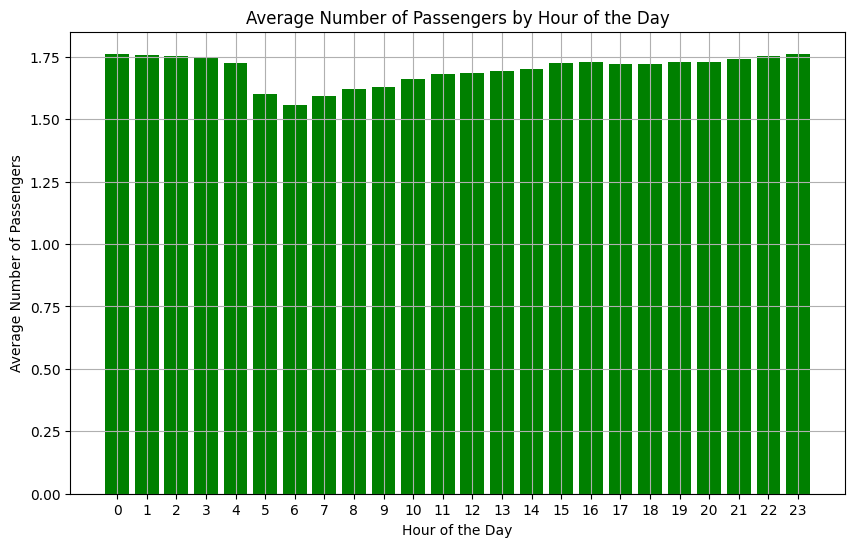

In [60]:
import csv
import matplotlib.pyplot as plt
import datetime


total_passengers = [0] * 24
trip_counts = [0] * 24

with open("trip_data_11.csv", "r") as f:
    reader = csv.reader(f)
    header = [col.strip() for col in next(reader)]
    
    pickup_datetime_index = header.index('pickup_datetime')
    passenger_count_index = header.index('passenger_count')
    
    for row in reader:
        pickup_datetime_str = row[pickup_datetime_index].strip()
        passenger_count_str = row[passenger_count_index].strip()
        try:
            pickup_datetime = datetime.datetime.strptime(pickup_datetime_str, '%Y-%m-%d %H:%M:%S')
            passenger_count = int(passenger_count_str)
            
            hour_of_day = pickup_datetime.hour
            total_passengers[hour_of_day] += passenger_count
            trip_counts[hour_of_day] += 1
            
        except ValueError:
            continue

average_passengers = [total_passengers[i] / trip_counts[i] if trip_counts[i] > 0 else 0 for i in range(24)]

hours = range(24)
plt.figure(figsize=(10, 6))
plt.bar(hours, average_passengers, color='green')
plt.xticks(hours)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Passengers')
plt.title('Average Number of Passengers by Hour of the Day')
plt.grid(True)
plt.show()


10.	Create a new CSV file which has only one out of every thousand rows.

In [74]:
import csv

input_file = "trip_data_11.csv"
output_file = "trip_data_sample.csv"

with open(input_file, "r") as infile, open(output_file, "w", newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    header = [col.strip() for col in next(reader)]
    writer.writerow(header)
    
    row_counter = 1

    for row in reader:
        if row_counter % 1000 == 0:
            writer.writerow(row)
        
        row_counter += 1

# print("New CSV file with every 1000th row from the existing file has been created.")


11.	Repeat step 9 with the reduced dataset and compare the two charts.

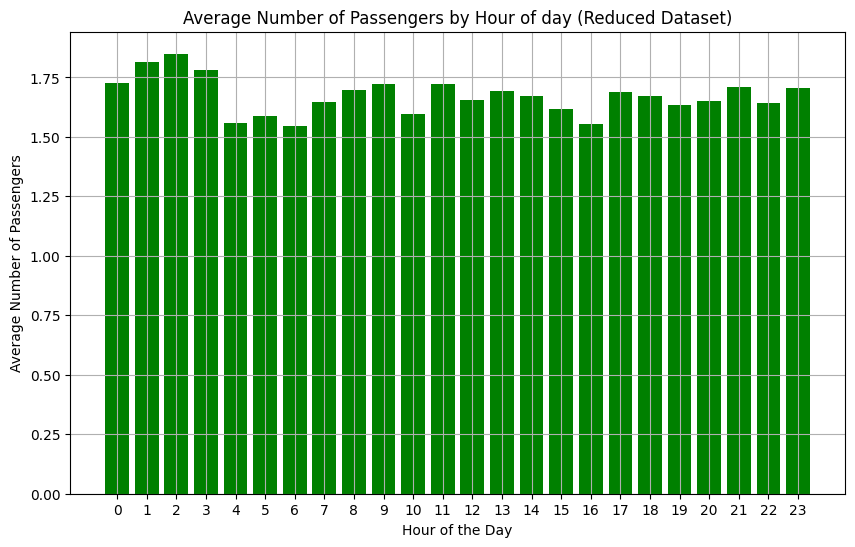

In [77]:
import csv
import matplotlib.pyplot as plt

passenger_count_per_hour = [0] * 24
trip_count_per_hour = [0] * 24

with open("trip_data_sample.csv", "r") as infile:
    reader = csv.reader(infile)
    header = next(reader)
    pickup_datetime_index = header.index('pickup_datetime')
    passenger_count_index = header.index('passenger_count')

    for row in reader:
        pickup_time = row[pickup_datetime_index].strip()
        passenger_count = int(row[passenger_count_index])

        pickup_hour = int(pickup_time.split()[1].split(":")[0])

        passenger_count_per_hour[pickup_hour] += passenger_count
        trip_count_per_hour[pickup_hour] += 1

average_passengers_per_hour = [
    passenger_count_per_hour[hour] / trip_count_per_hour[hour] if trip_count_per_hour[hour] > 0 else 0
    for hour in range(24)
]

plt.figure(figsize=(10, 6))
plt.bar(range(24), average_passengers_per_hour, color='green')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Passengers')
plt.title('Average Number of Passengers by Hour of day (Reduced Dataset)')
plt.xticks(range(24))
plt.grid(True)
plt.show()


By comparing the sample/reduced dataset chart with the original one, we can observe that:
Both datasets indicate higher passenger numbers in the early AM hours, but the reduced dataset highlights this more sharply.
Average Passengers for larger dataset are fairly stable throughout the day, with a slight dip around 5am - 10am, whereas the peak for the reduced dataset is around 1am - 3am with a sudden dip after 3am.